# (2019-02 - Fordgobike-Tripdata)
## by (Belal Abdelnasser)

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. Note that this dataset will require some data wrangling in order to make it tidy for analysis. There are multiple cities covered by the linked system, and multiple data files will need to be joined together if a full year’s coverage is desired.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

- Drop NANs

In [4]:
df.dropna(inplace=True)

### Some Data Wrangling Steps.
- Change start_time and end_time column data type to datetime
- Convert duration_sec to duration_hour
- Change user_type from str to category
- Change ids columns to str
- Drop NANs

In [5]:
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df['start_station_id'] = df['start_station_id'].astype(str)
df['end_station_id'] = df['end_station_id'].astype(str)
df['bike_id'] = df['bike_id'].astype(str)
df['user_type'] = df['user_type'].astype('category')

In [7]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

### What is the structure of your dataset?

> 183412 entries, 16 columns.
>###### - duration_sec
>###### - start_time                |   183412 non-null  object 
>###### - end_time                  |   183412 non-null  object 
>###### - start_station_id          |   183215 non-null  float64
>###### - start_station_name        |   183215 non-null  object 
>###### - start_station_latitude    |   183412 non-null  float64
>###### - start_station_longitude   |   183412 non-null  float64
>###### - end_station_id            |   183215 non-null  float64
>###### - end_station_name          |   183215 non-null  object  
>###### - end_station_latitude      |   183412 non-null  float64
>###### - end_station_longitude     |   183412 non-null  float64
>###### - bike_id                   |   183412 non-null  int64  
>###### - user_type                 |   183412 non-null  object 
>###### - member_birth_year         |   175147 non-null  float64
>###### - member_gender             |   175147 non-null  object 
>###### - bike_share_for_all_trip   |   183412 non-null  object 
>#### dtypes: float64(7), int64(2), object(7)

### What is/are the main feature(s) of interest in your dataset?
>###### - start_time
>###### - duration_sec
>###### - end_time                  
>###### - start_station_id          
>###### - start_station_name          
>###### - end_station_id            
>###### - end_station_name          
>###### - bike_share_for_all_trip
>###### - user_type
>###### - Member_birth date
>###### - Member_gender
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> - start_time
> - end_time
> - duration_sec
> - user_type
> - member birth date
> - member gender

In [9]:
df.duration_sec.max()
#df[df.duration_sec == 272]

84548

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

>- It's obvious that the Subscriber type is much more than Customer Type

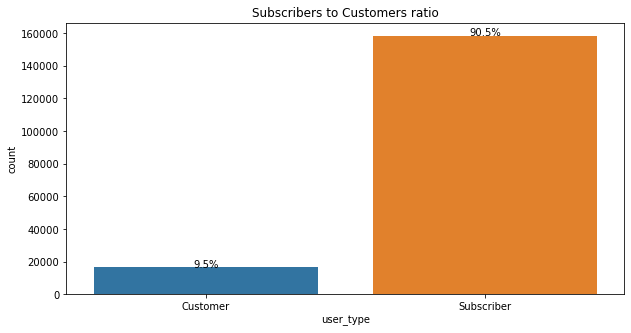

In [10]:
plt.figure(figsize=(10,5))
sb.countplot(data=df,x='user_type')
plt.title('Subscribers to Customers ratio')
type_counts = df['user_type'].value_counts()
locs, labels = plt.xticks()
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/df.shape[0])
    plt.text(loc, count+5, pct_string, ha = 'center', color = 'black')

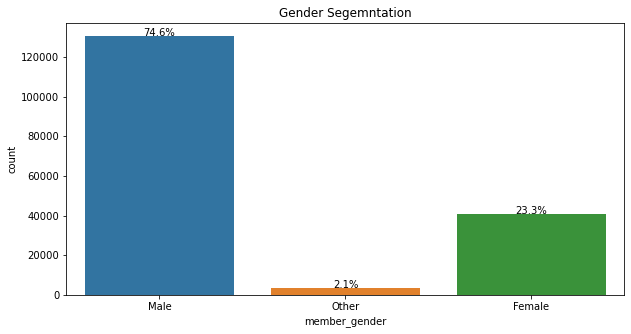

In [11]:
plt.figure(figsize=(10,5))
sb.countplot(data=df,x='member_gender')
type_counts = df['member_gender'].value_counts()
plt.title('Gender Segemntation')
locs, labels = plt.xticks() 
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/df.shape[0])
    plt.text(loc, count, pct_string, ha = 'center', color = 'black')

>- We can see that males is more than females so far

- Bike Sharing all the trip is signficanlly small compared to Non-shared Trips 

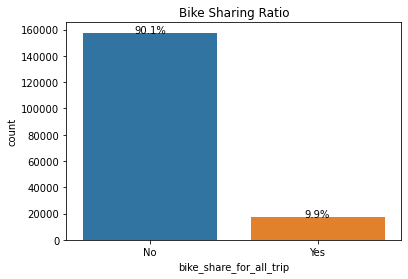

In [12]:
sb.countplot(data=df,x='bike_share_for_all_trip')
type_counts = df['bike_share_for_all_trip'].value_counts()
locs, labels = plt.xticks()
plt.title('Bike Sharing Ratio')
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/df.shape[0])
    plt.text(loc, count, pct_string, ha = 'center', color = 'black')

<AxesSubplot:title={'center':'Top 10 Start Station Name'}, ylabel='Station Name'>

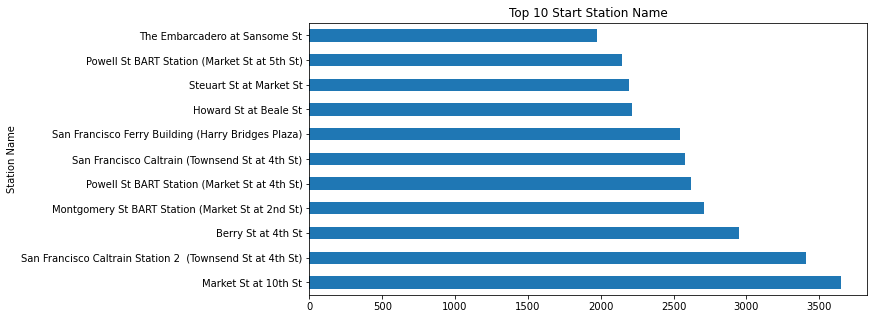

In [13]:
plt.figure(figsize=(10,5))
df['start_station_name'].value_counts().sort_values(ascending=False)[0:11].plot(kind='barh',ylabel='Number of Trips'
,xlabel='Station Name',title='Top 10 Start Station Name')

>- most frequent start stations is Market St at 10th St

> ### Observations
>- Distribution of trips duration is Right skewed with mean equal 704.
>- There are alot of outliers

Text(0, 0.5, 'Number Of Trips')

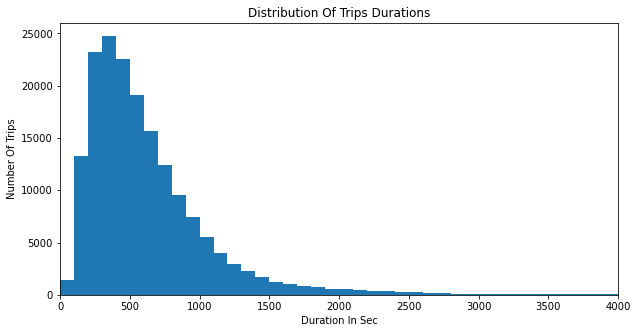

In [14]:
plt.figure(figsize=(10,5))
plt.hist(data=df,x='duration_sec',bins=np.arange(0,df.duration_sec.max()+100,100))
plt.xlim((0,4000))
plt.title('Distribution Of Trips Durations')
plt.xlabel('Duration In Sec')
plt.ylabel('Number Of Trips')

In [15]:
df.duration_sec.mean()

704.0027436096758

In [16]:
df['age']= df.member_birth_year.apply(lambda x : abs(x - 2021))
df.age.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

> ### Feature Engineering 
>- Create (Age) new feature from birth data column
>- Create month, weekday, hour and trip columns from start_time column.

Text(0, 0.5, 'Number Of Members')

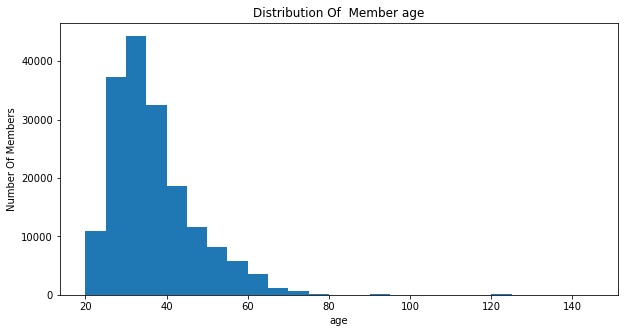

In [17]:
plt.figure(figsize=(10,5))
plt.hist(data=df,x='age',bins=np.arange(df.age.min(),df.age.max()+5,5))
plt.title('Distribution Of  Member age')
plt.xlabel('age')
plt.ylabel('Number Of Members')

>- The Distibution of members age is right skewed and also we can see some outliers

In [28]:
df['month'] = df.start_time.dt.month
df['weekday'] = df.start_time.dt.weekday
df['hour'] = df.start_time.dt.hour
df['Trip'] = df.start_station_name  + df.end_station_name
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,month,weekday,hour,Trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,37.0,2,3,17,Montgomery St BART Station (Market St at 2nd S...
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,49.0,2,3,12,Market St at Dolores StPowell St BART Station ...
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,32.0,2,3,17,Grove St at Masonic AveCentral Ave at Fell St
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,47.0,2,3,23,Frank H Ogawa Plaza10th Ave at E 15th St
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959.0,Male,No,62.0,2,3,23,4th St at Mission Bay Blvd SBroadway at Kearny


>- Create month, weekday, hour and trip columns from start_time column.

> ### Insights
>- Bike Trips increase in Weekdays and decrease in weekends
>- Most trips are between 7:00 AM and 8:00 PM

Text(0, 0.5, 'Trips')

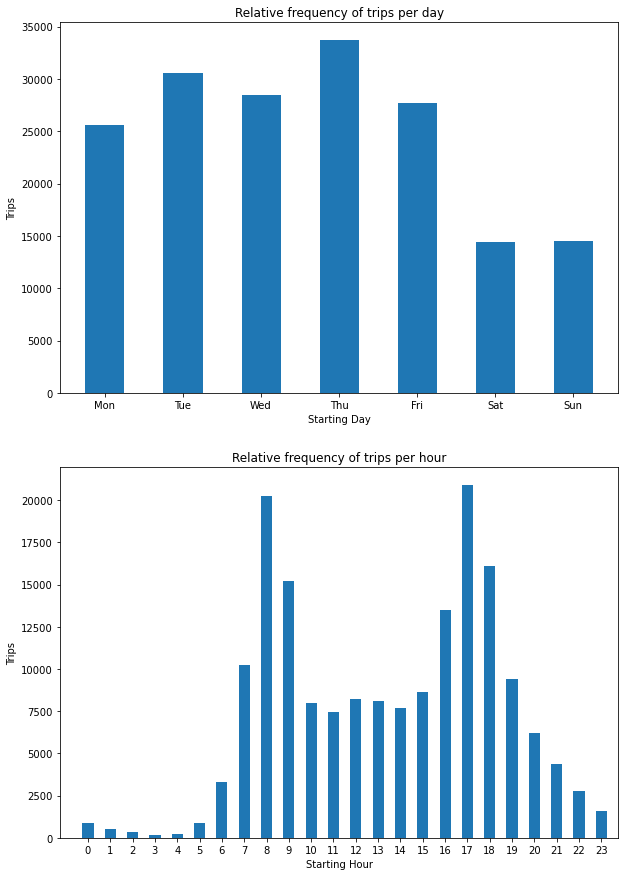

In [19]:
plt.figure(figsize=(10,15))
plt.subplot(2,1,1)
plt.hist(data=df,x='weekday',bins=np.arange(0,df.weekday.max()+1,0.5))
plt.xticks(ticks=[0.25,1.25,2.25,3.25,4.25,5.25,6.25],labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.title('Relative frequency of trips per day')
plt.xlabel('Starting Day')
plt.ylabel('Trips')
plt.subplot(2,1,2)
plt.hist(data=df,x='hour',bins=np.arange(0,df.hour.max()+1,0.5))
plt.xticks(ticks=[0.25,1.25,2.25,3.25,4.25,5.25,6.25,7.25,8.25,9.25,10.25,11.25,12.25,13.25,14.25,15.25,16.25,
17.25,18.25,19.25,20.25,21.25,22.25,23.25],labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.xlim((-1,24))
plt.title('Relative frequency of trips per hour')
plt.xlabel('Starting Hour')
plt.ylabel('Trips')

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
> ### 2-2019
>- 90.5% subscribers and 9.5% customers.
>- Thursday have te most taken trips.
>- 90.1% Sharing - 9.9 % Non-sharing
>- 5:00 AM is the most starting hour of trips.
>- Age distribution shows that there is outliers. This the only unusual point in all valriables of interest.
>- Duration distribution also have many extreme values but I can't decide it is outliers or not becuase I don't have domain knowledge.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
> ### 2-2019
>- Create month, weekday, hour and trip columns from start_time column To find out When are most trips taken in terms of time of day, day of the week.
>- Create (Age) new feature from birth data column

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

> ### Insights
>- As expected number of trips taken by Subscribers is much more than Customers for daily basis as well as hourly basis. 

Text(0.5, 1.0, 'Daily Trips per user type')

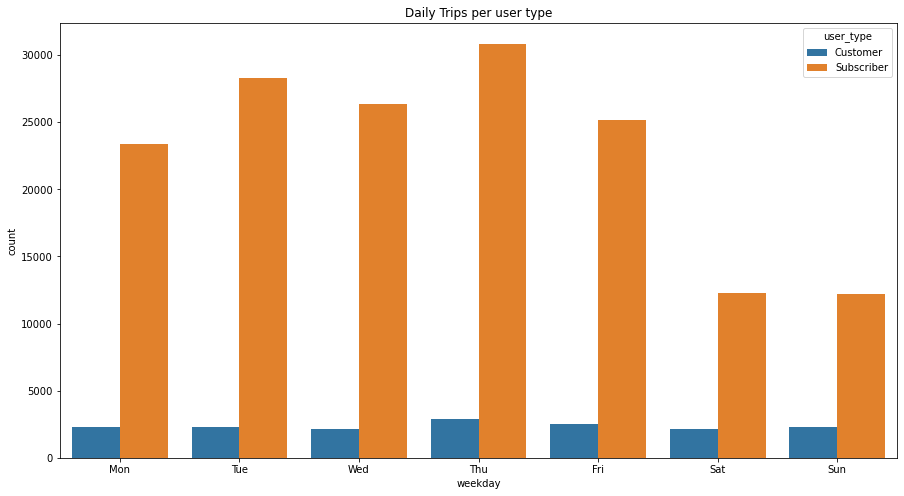

In [69]:
plt.figure(figsize=(15,8))
days=[0,1,2,3,4,5,6]
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=days)
df['weekday'] = df['weekday'].astype(vclasses)
sb.countplot(data = df, x = 'weekday', hue = 'user_type')
plt.xticks(ticks=[0,1,2,3,4,5,6],labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.title('Daily Trips per user type')

Text(0.5, 1.0, 'Hourly Trips per user type')

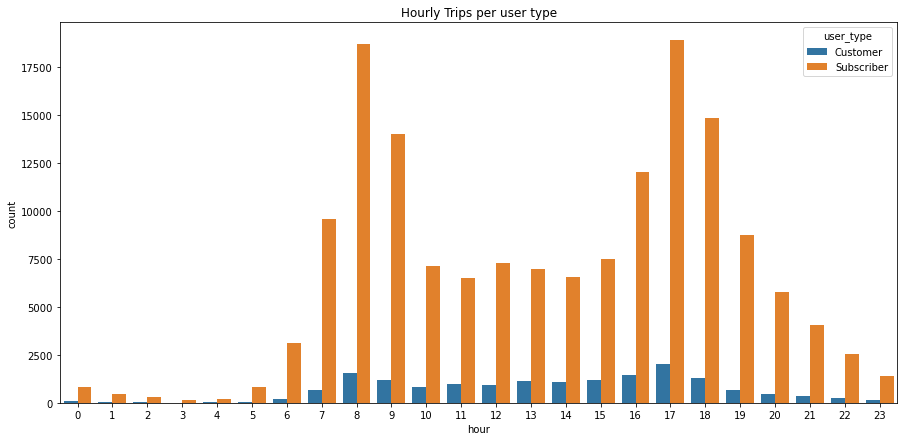

In [70]:
plt.figure(figsize=(15,7))
hour=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=hour)
df['hour'] = df['hour'].astype(vclasses)
sb.countplot(data = df, x = 'hour', hue = 'user_type')
plt.title('Hourly Trips per user type')

> ### Insights
> - We find from the plots that trips duration slightly change through different weekdays. The mean duration(sec) of trips is very close through weekdays.


Text(0.5, 1.0, 'Boxplot Plot: Duration_sec Vs Weekday')

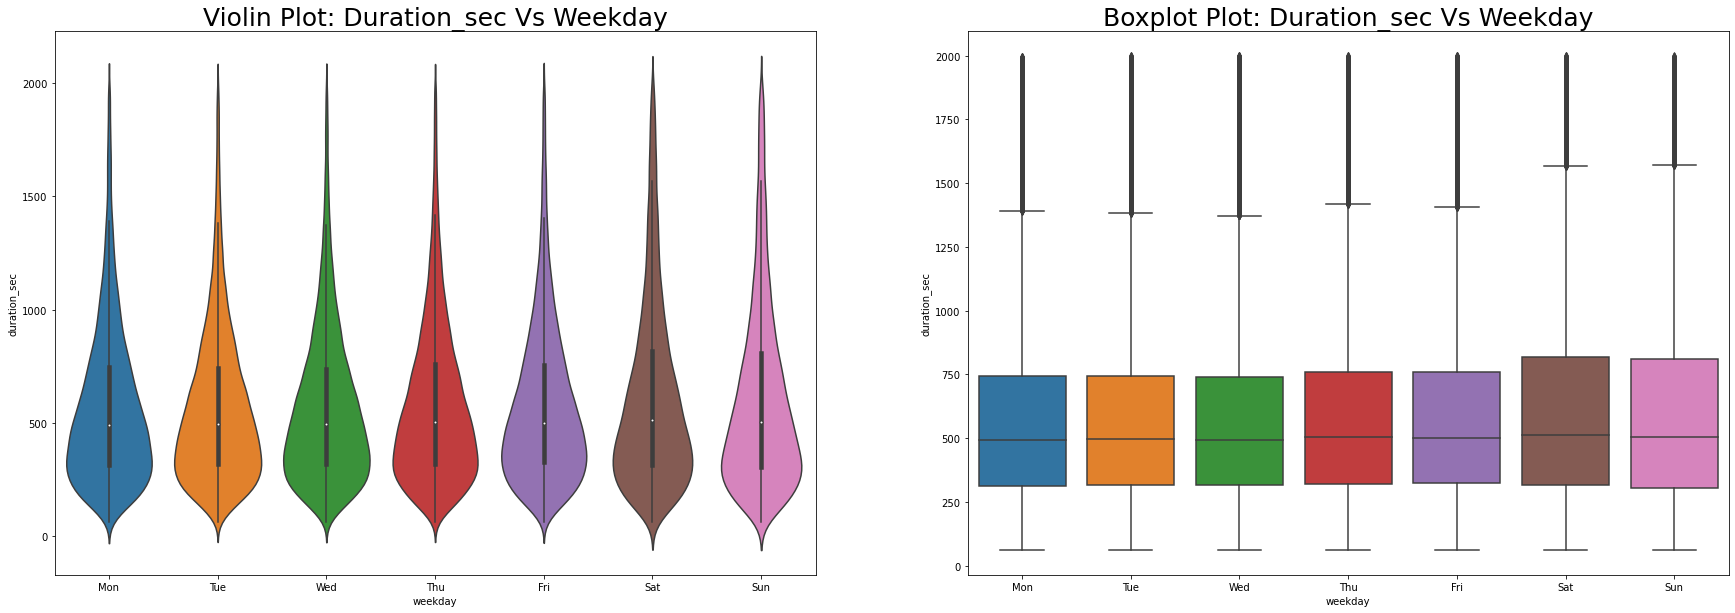

In [22]:
plt.figure(figsize=(30,10))
weekdays = [0,1,2,3,4,5,6]
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=weekdays)
plt.subplot(1,2,1)
sb.violinplot(data=df[df.duration_sec<2000], x='weekday', y='duration_sec')
plt.xticks(ticks=[0,1,2,3,4,5,6],labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.title('Violin Plot: Duration_sec Vs Weekday',fontdict={'fontsize':25})
plt.subplot(1,2,2)
sb.boxplot(data=df[df.duration_sec<2000], x='weekday', y='duration_sec')
plt.xticks(ticks=[0,1,2,3,4,5,6],labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.title('Boxplot Plot: Duration_sec Vs Weekday',fontdict={'fontsize':25})

> - We find that the mean Duration of trips is very close to each other during hours of the day. But the largest mean of duration of trips versus hours of the day is at 8:00 AM and 5:00 PM

Text(0.5, 1.0, 'Boxplot Plot: Duration_sec Vs Hours Of Day')

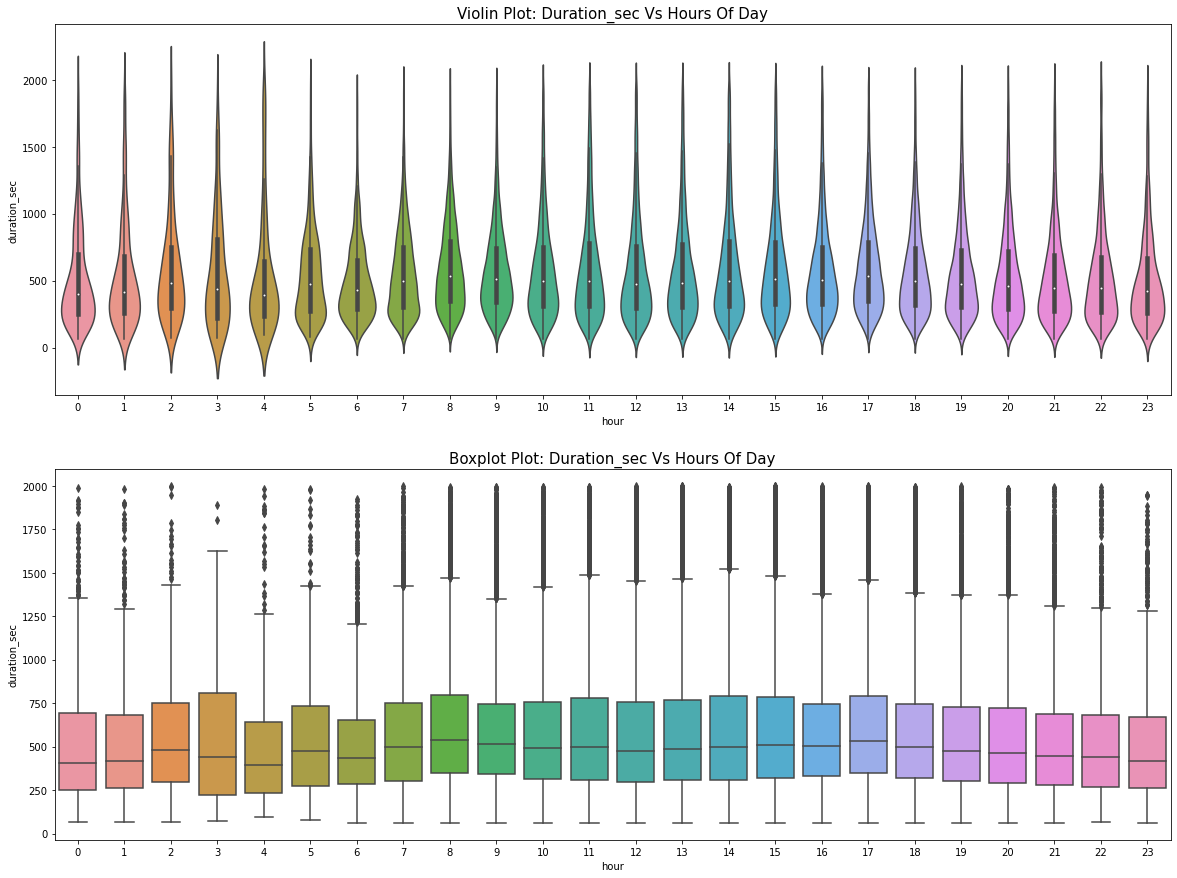

In [23]:
plt.figure(figsize=(20,15))
weekdays = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=weekdays)
plt.subplot(2,1,1)
sb.violinplot(data=df[df.duration_sec<2000], x='hour', y='duration_sec')
plt.title('Violin Plot: Duration_sec Vs Hours Of Day',fontdict={'fontsize':15})
plt.subplot(2,1,2)
sb.boxplot(data=df[df.duration_sec<2000], x='hour', y='duration_sec')
plt.title('Boxplot Plot: Duration_sec Vs Hours Of Day',fontdict={'fontsize':15})

Text(0.5, 1.0, 'User Type ratio for each gender')

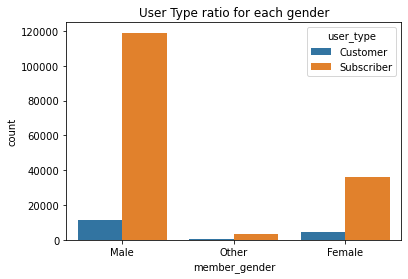

In [37]:
sb.countplot(data = df, x = 'member_gender', hue = 'user_type')
plt.title('User Type ratio for each gender',fontdict={'fontsize':12})

> - We find that most of users is subscribers regardless of gender.

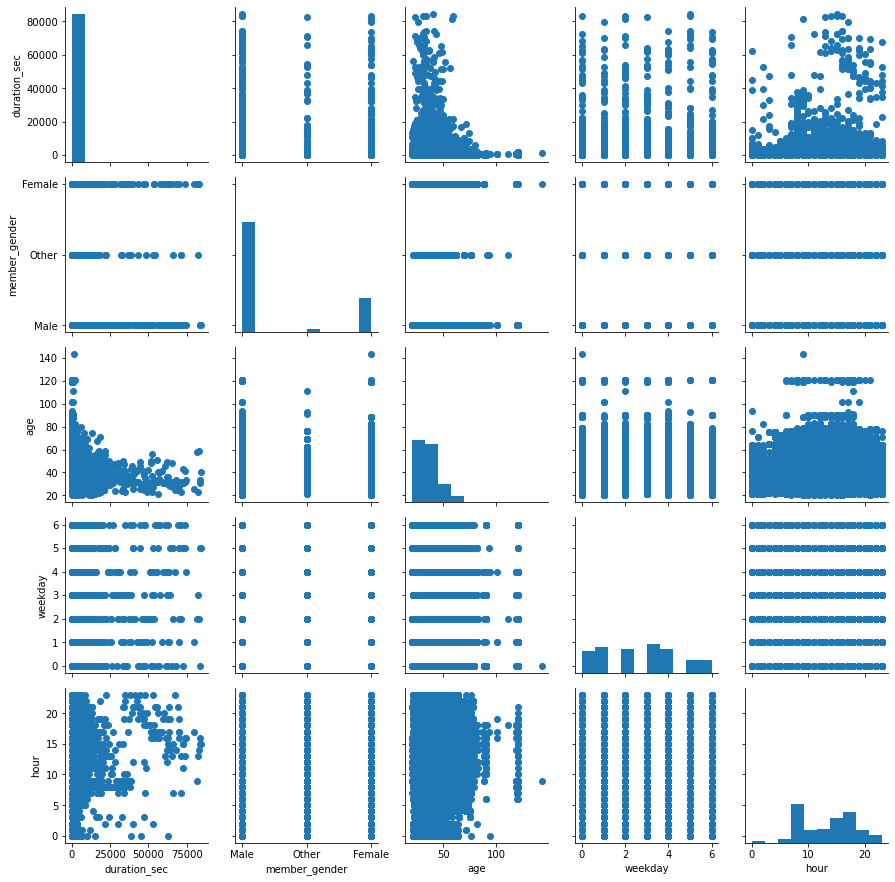

In [50]:
g = sb.PairGrid(data = df, vars = ['duration_sec',
                                   'member_gender','age','weekday','hour'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
> ### 2-2019
> - We find from the plots that trips duration slightly change through different weekdays. The mean duration(sec) of trips is very close through weekdays.
> - We find that the mean Duration of trips is very close to each other during hours of the day. But the largest mean of duration of trips versus hours of the day is at 8:00 AM and 5:00 PM.
> - We find that most of users is subscribers regardless of gender. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
> ### 2-2019
> - The rush hour of trips is before or after work hours which is pretty relevant becuase distribution of age of users shows that most of users is at work age (20:50 years old)
> - Almsot All od users are subscribers. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

>- Daily trips duration change slightly for subscribers.
>- For customers there are clear change in weekdays trips duration and the the most increase happened in weekends.

Text(0.5, 1.0, 'Barplot:User Type Effect On Trip Duration (weekdays)')

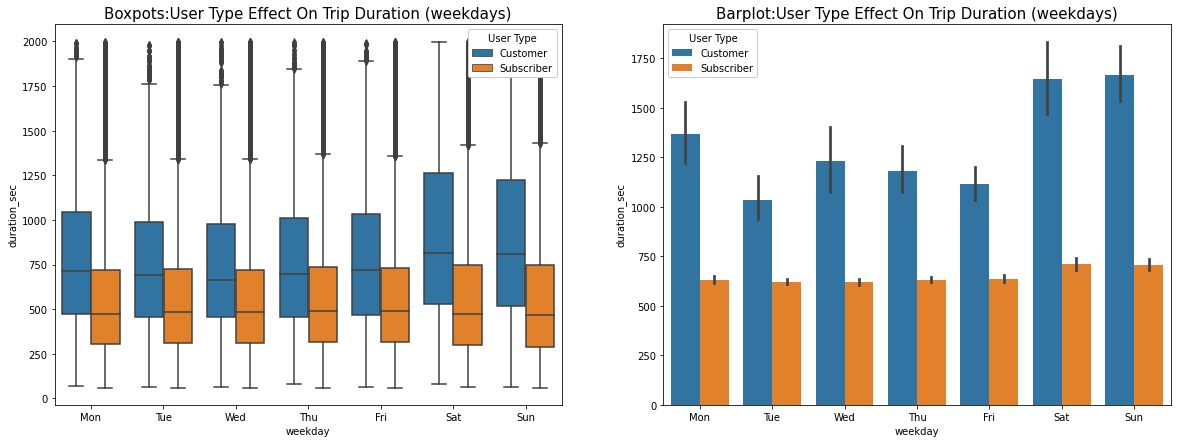

In [43]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sb.boxplot(data = df[df.duration_sec<2000] , x="weekday", y="duration_sec", hue="user_type")
plt.xticks(ticks=[0,1,2,3,4,5,6],labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.title('Boxpots:User Type Effect On Trip Duration (weekdays)',fontdict={'fontsize':15})
plt.legend(loc = 'upper right', ncol = 1, framealpha = 1, title = 'User Type')
plt.subplot(1,2,2)
ax = sb.barplot(data = df, x = 'weekday', y = 'duration_sec', hue = 'user_type')
ax.legend(loc = 0, ncol = 1, framealpha = 1, title = 'User Type')
plt.xticks(ticks=[0,1,2,3,4,5,6],labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.title('Barplot:User Type Effect On Trip Duration (weekdays)',fontdict={'fontsize':15})

> - For subscribers there are little change in Trips duration for each hour during the whole day. But for customers there significant change during day hours. As we can see at 3:00 AM is the biggest rise in Trips duration then comes 2:00 AM.

Text(0.5, 1.0, 'Barplot:User Type Effect On Trip Duration (Hours)')

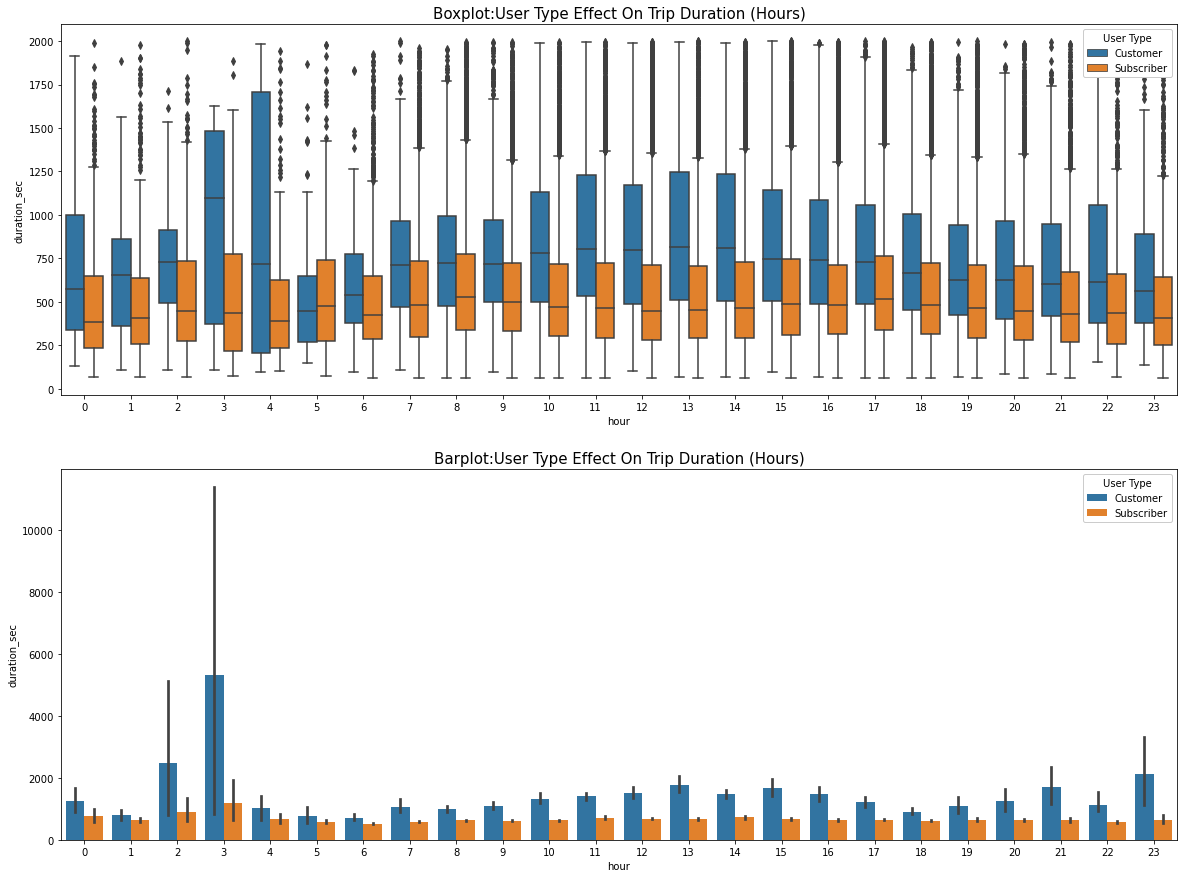

In [44]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sb.boxplot(x="hour", y="duration_sec", hue="user_type",
                 data=df[df.duration_sec<2000])
plt.legend(loc = 'upper right', ncol = 1, framealpha = 1, title = 'User Type')
plt.title('Boxplot:User Type Effect On Trip Duration (Hours)',fontdict={'fontsize':15})
plt.subplot(2,1,2)
ax = sb.barplot(data = df, x = 'hour', y = 'duration_sec', hue = 'user_type')
ax.legend(loc = 'upper right', ncol = 1, framealpha = 1, title = 'User Type')
plt.title('Barplot:User Type Effect On Trip Duration (Hours)',fontdict={'fontsize':15})

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
> ### 2-2019
> - Daily trips duration change slightly for subscribers.
> - For customers there are clear change in weekdays trips duration and the the most increase happened in weekends.
> - For subscribers there are little change in Trips duration for each hour during the whole day. But for customers there significant change during day hours. As we can see at 3:00 AM is the biggest rise in Trips duration then comes 2:00 AM.

### Were there any interesting or surprising interactions between features?
> ### 2-2019
> - In Weekly basis the largest Trips duration for customers is in weekends
> - In Weekly basis Customers make larger average Trips durations than subscribers.
> - In Weekly basis Subscribers make small regular trips duration (everyday)-there is no peek- but I think for long term plan(months).
> - In Hourly basis Customers .
> - In Hourly basis Subscribers make small regular trips duration but I think for long term plan. 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!